In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('data/creditcard-training.csv')

# Exploratory Data Analysis

In [3]:
#Get shape
df.shape

(227844, 32)

In [4]:
#Print head
df.head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [5]:
#Rename the fraud column
df = df.rename( {'Fraud? (1: Fraud, 0:  No Fraud)' : 'Fraud'}, axis=1)
df.head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [6]:
#Get NAs 
df[df.isnull().any(axis=1)]

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
10,10,7.80,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,...,-0.629152,-1.423236,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408
16,12,12.99,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,...,0.288069,-0.586057,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333
25,22,26.43,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,...,-0.959537,0.543985,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664
28,23,33.00,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,...,-0.200331,0.740228,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392
42,33,14.80,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,...,0.119168,0.850893,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501
45,34,21.34,0,-0.075662,-0.709192,0.381219,-1.372080,NaN,-0.078355,-0.164222,...,-0.410195,-0.013898,-0.072440,-13.340241,-0.188353,0.744207,1.124304,-0.002602,-0.269953,0.306788
63,42,32.51,0,-0.172409,-0.118962,-0.550002,-0.148052,NaN,NaN,-0.257663,...,3.736574,0.316446,0.672296,-0.165037,-0.276191,-0.274214,-0.161506,-0.495120,-0.269502,0.015140
81,52,6.67,0,-0.626936,-0.369716,-0.031799,-0.215342,0.055020,NaN,-0.087813,...,0.301067,-0.132960,0.227885,-3.121531,0.502861,-1.468036,0.413362,0.645046,0.083904,0.252191
88,56,10.84,0,1.654140,-0.392648,-0.875960,0.183946,NaN,0.167231,-0.239426,...,2.796671,0.470283,0.265333,10.767055,-0.042677,-0.110867,0.017131,0.208725,-0.735586,0.919513
98,67,28.28,0,0.507764,-0.260264,0.246631,0.008856,NaN,NaN,-0.140047,...,0.258495,-0.012189,0.102136,-8.411696,-0.680510,0.208014,-0.106846,-0.550296,1.198556,-0.286164


In [7]:
#For now I'm dropping NAs. Later we'll figure out a way to deal with it
#df = df.dropna()

Text(0, 0.5, 'Frequency')

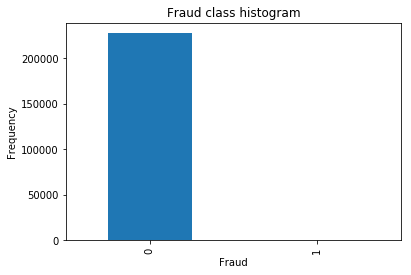

In [8]:
#Checking the Target Classes
count_classes = pd.value_counts(df['Fraud'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Fraud")
plt.ylabel("Frequency")

#The historgram shows that there is a need for resampling 


In [9]:
#Since the value of amount has a very different scale from the rest, we should condier normalising the column "amount"
#Seconds since reference time column will be dropped as well since it has no significant contribution to the model building as it is simply a cheorogrphical order of the reference time
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Seconds since reference time','Amount'],axis=1)
df.head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount
0,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,...,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787,0.234706
1,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,...,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425,-0.351832
2,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,...,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654,1.149024
3,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,...,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024,0.130436
4,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,...,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739,-0.083174


In [10]:
#Get difference in means between Fraud and not-fraud
df.groupby('Fraud').mean()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount
Fraud,,,,,,,,,,,,,,,,,,,,,
0,0.049387,0.002841,0.028799,-0.018164,-0.008677,0.009279,-0.007071,-0.022976,-0.009824,0.001263,...,-0.015406,0.002776,0.026436,0.045807,0.016831,-0.032826,0.068994,0.009538,0.007167,-0.000255
1,-0.098209,-4.559229,-7.423533,-2.589217,0.766809,0.374396,0.765659,0.013088,-0.060036,-0.083433,...,-6.264641,0.663762,0.613894,-7.024019,-0.048627,-6.685076,4.046820,-6.135121,-2.696376,0.139044


There are quite a few variables with a huge difference between the fraudulent and non-fraudulent data 

In [11]:
#Get number of fraud and not fraud values
fraud_rows = df['Fraud'].value_counts()
total_rows = df.shape[0]
percentage_fraud = fraud_rows[1]/total_rows

print("Fraud rows: ", fraud_rows[1])
print("Total rows: ", total_rows)
print("Percentage rows: ", percentage_fraud)

Fraud rows:  417
Total rows:  227844
Percentage rows:  0.0018301996102596514


<div class="alert alert-danger">
Since the dataset is quite imbalanced (fraud vs non-fraud), we will be using <b>SMOTE</b> to create some synthetic observations 
</div>

In [12]:
#Function to plot data. Will be used later
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [13]:
#We will be using SMOTE only on the training dataset. Thus, we need to split now
y = df['Fraud']
X = df.drop('Fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Data Resampling

In [ ]:
method = SMOTE(kind='regular')

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [ ]:
plot_data(X_resampled, y_resampled)
type(X_resampled)

In [ ]:
print("Before resampling")
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print("After resampling")
print(pd.value_counts(pd.Series(y_resampled)))

## Models to detect Fraud

In [ ]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_train, y_train)

# Get your performance metrics
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

In [ ]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get your performance metrics
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

## Combine Logistic regression and SMOTE

In [ ]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train,y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

## Use Random Forest

In [ ]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the model as the random forest
model_rf = RandomForestClassifier(random_state=5)

In [ ]:
# Fit the model to our training set
model.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

## Performance Metrics

In [ ]:
# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

In [ ]:
#Calculate Average precisions
average_precision = average_precision_score(y_test, predicted)
average_precision